In [1]:
%config Completer.use_jedi = False

In [2]:
import ta
import investpy
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df1 = investpy.get_stock_historical_data(stock='BRML3', country='brazil', from_date='01/01/2019', to_date='30/03/2021')
df1.head()

Open   High    Low  Close    Volume Currency
Date                                                     
2019-01-02  12.22  12.63  12.12  12.59  14193800      BRL
2019-01-03  12.48  12.68  12.36  12.67   9265200      BRL
2019-01-04  12.55  12.71  12.43  12.43  11161000      BRL
2019-01-07  12.31  12.44  12.14  12.35   4569500      BRL
2019-01-08  12.40  12.44  12.25  12.37   4509200      BRL

In [4]:
df2 = investpy.get_stock_historical_data(stock='PETR4', country='brazil', from_date='01/01/2019', to_date='30/03/2021')
df3 = investpy.get_stock_historical_data(stock='WEGE3', country='brazil', from_date='01/01/2019', to_date='30/03/2021')

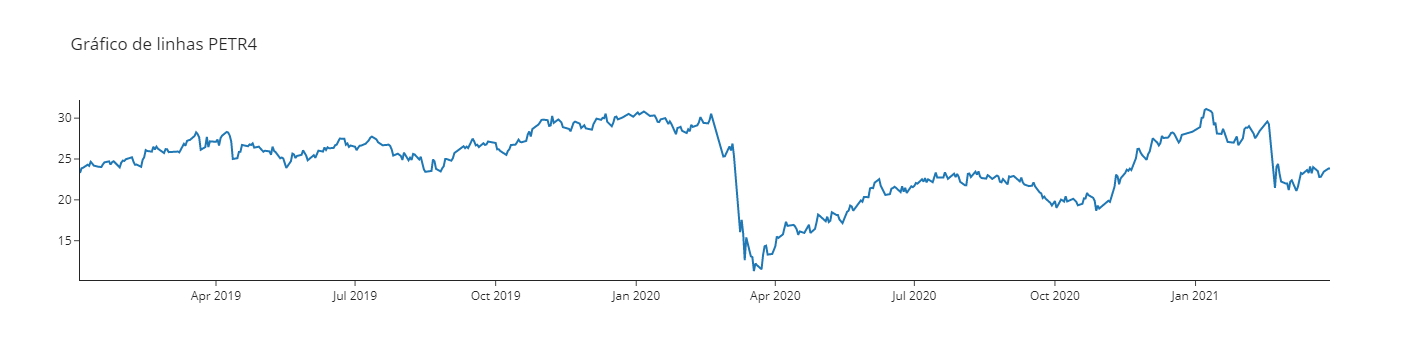

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='PETR4', x=df2.index, y=df2.Close))
fig.update_layout(title_text='Gráfico de linhas PETR4', template='simple_white')
fig.show()

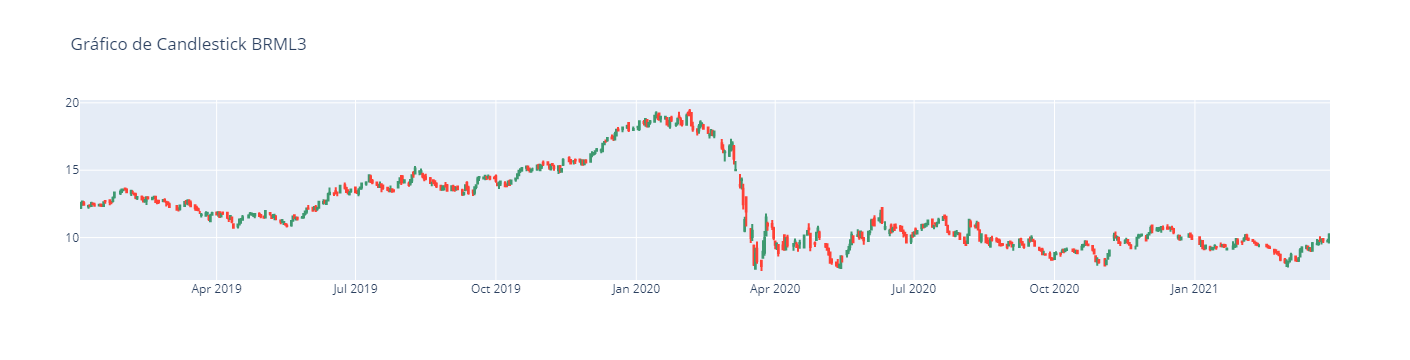

In [6]:
fig = go.Figure()
fig.add_trace(go.Candlestick(name='BRML3', x=df1.index, close=df1['Close'], open=df1['Open'], high=df1['High'], low=df1['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Gráfico de Candlestick BRML3')
fig.show()

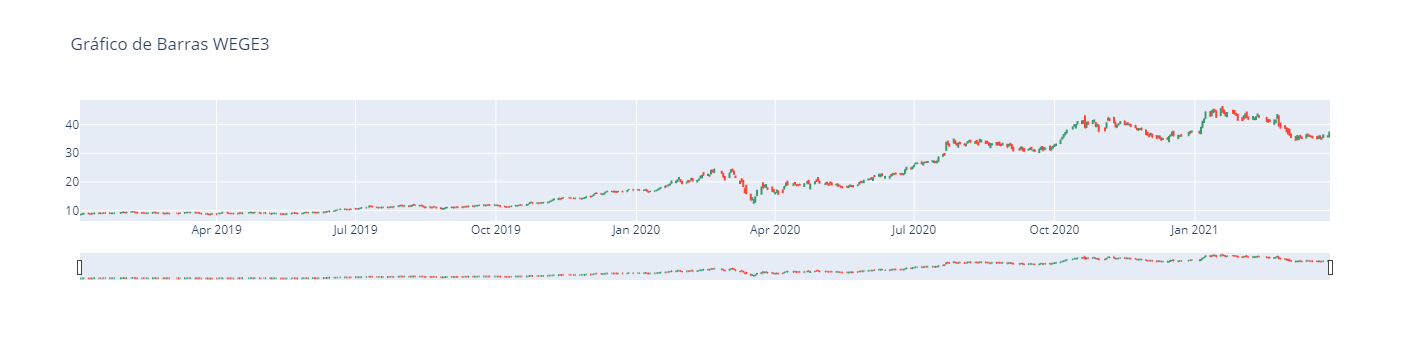

In [7]:
fig = go.Figure()
fig.add_trace(go.Ohlc(name='WEGE3', x=df3.index, close=df3['Close'], open=df3['Open'], high=df3['High'], low=df3['Low']))
fig.update_layout(title_text='Gráfico de Barras WEGE3')
fig.show()

# Indicadores da Análise Técnica
## Indicadores de Momentum

In [8]:
# Rate of change

from ta.momentum import ROCIndicator

roc = ROCIndicator(df1['Close'])
df1['ROC'] = roc.roc()
df1

Open   High    Low  Close    Volume Currency        ROC
Date                                                                
2019-01-02  12.22  12.63  12.12  12.59  14193800      BRL        NaN
2019-01-03  12.48  12.68  12.36  12.67   9265200      BRL        NaN
2019-01-04  12.55  12.71  12.43  12.43  11161000      BRL        NaN
2019-01-07  12.31  12.44  12.14  12.35   4569500      BRL        NaN
2019-01-08  12.40  12.44  12.25  12.37   4509200      BRL        NaN
...           ...    ...    ...    ...       ...      ...        ...
2021-03-24   9.77  10.10   9.68   9.74  26928000      BRL  17.349398
2021-03-25   9.71   9.95   9.48   9.82  23246700      BRL  18.742443
2021-03-26   9.90   9.93   9.60   9.81  11872500      BRL  15.957447
2021-03-29   9.71   9.91   9.65   9.74   7898800      BRL   7.505519
2021-03-30   9.64  10.32   9.64  10.23  15812600      BRL  10.475162

[556 rows x 7 columns]

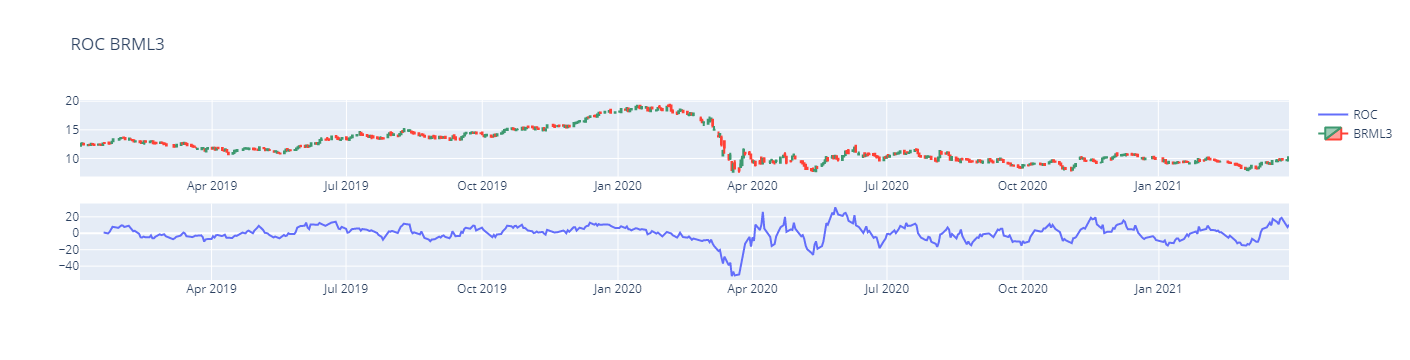

In [9]:
# Gráfico com preço e indicador

fig = go.Figure()
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='ROC', x=df1.index, y=df1['ROC']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df1.index, close=df1['Close'], open=df1['Open'], high=df1['High'], low=df1['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='ROC BRML3')
fig.show()

In [10]:
# Percentage Price Oscillator (PPO)
from ta.momentum import PercentagePriceOscillator

PPO = PercentagePriceOscillator(df2['Close'])
df2['PPO'] = PPO.ppo()
df2['PPO_hist'] = PPO.ppo_hist()
df2['PPO_line'] = PPO.ppo_signal()
df2

Open   High    Low  Close     Volume Currency       PPO  \
Date                                                                   
2019-01-02  21.83  23.42  21.57  23.29  104534800      BRL       NaN   
2019-01-03  23.55  24.02  23.04  23.86   95206400      BRL       NaN   
2019-01-04  24.05  24.14  23.69  23.93   72119800      BRL       NaN   
2019-01-07  24.05  25.09  23.91  24.30  121711904      BRL       NaN   
2019-01-08  24.59  24.61  23.98  24.16   68761800      BRL       NaN   
...           ...    ...    ...    ...        ...      ...       ...   
2021-03-24  23.19  23.54  22.82  22.82   62209500      BRL -2.660539   
2021-03-25  22.70  23.30  22.16  23.20   78839800      BRL -2.471749   
2021-03-26  23.48  23.88  23.11  23.46   60631800      BRL -2.206641   
2021-03-29  23.34  23.83  23.28  23.83   49670900      BRL -1.847259   
2021-03-30  23.64  23.99  23.57  23.83   40703300      BRL -1.544694   

            PPO_hist  PPO_line  
Date                            
2019-01-02       NaN       NaN  
2019-01-03       NaN       NaN  
2019-01-04       NaN       NaN  
2019-01-07       NaN       NaN  
2019-01-08       NaN       NaN  
...              ...       ...  
2021-03-24  0.902104 -3.562644  
2021-03-25  0.872716 -3.344465  
2021-03-26  0.910259 -3.116900  
2021-03-29  1.015713 -2.862972  
2021-03-30  1.054622 -2.599316  

[556 rows x 9 columns]

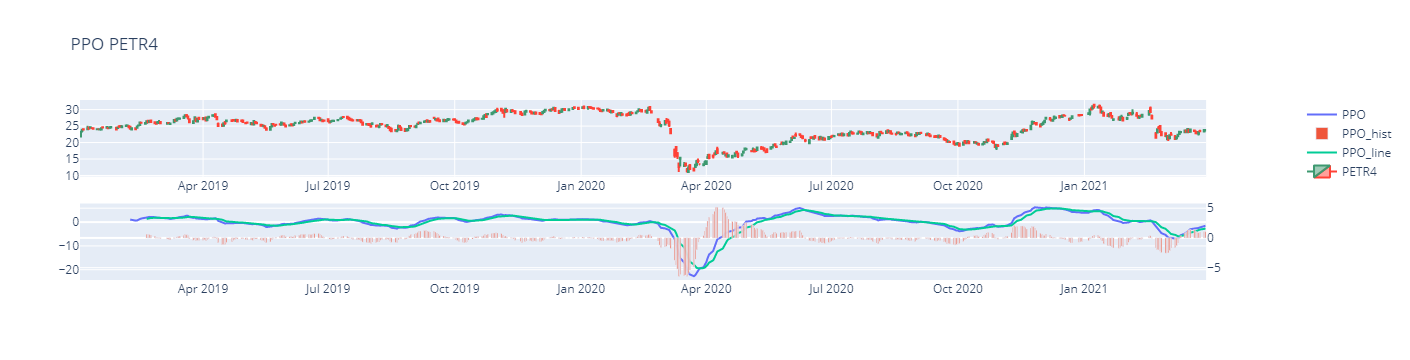

In [11]:
#fig = go.Figure()
fig = make_subplots(rows=2, cols=1, specs=[[{'secondary_y':True}], [{'secondary_y':True}]])
fig.add_trace(go.Scatter(name='PPO', x=df2.index, y=df2['PPO']), row=2, col=1)
fig.add_trace(go.Bar(name='PPO_hist', x=df2.index, y=df2['PPO_hist']), row=2, col=1, secondary_y=True)
fig.add_trace(go.Scatter(name='PPO_line', x=df2.index, y=df2['PPO_line']), row=2, col=1)
fig.add_trace(go.Candlestick(name='PETR4', x=df2.index, close=df2['Close'], open=df2['Open'], high=df2['High'], low=df2['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='PPO PETR4')
fig.show()

## Osciladores

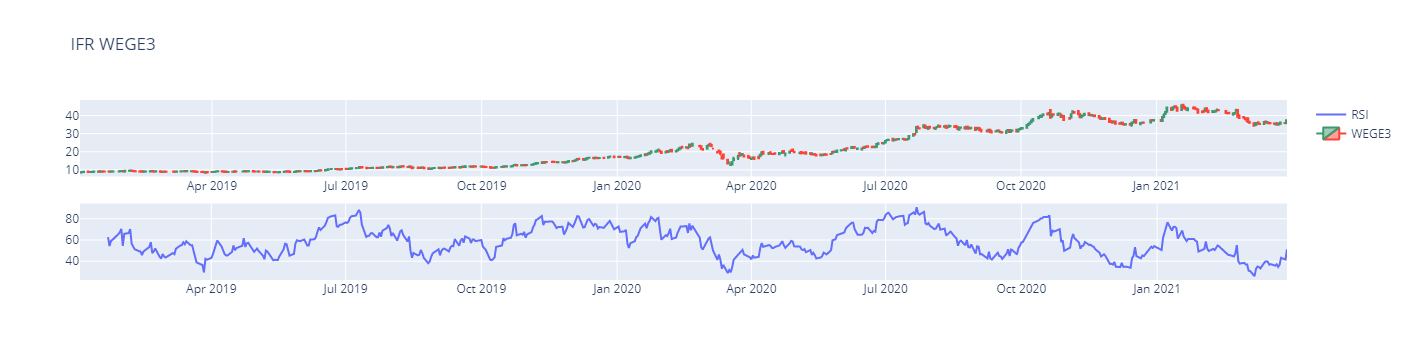

In [12]:
 # IFR

 from ta.momentum import RSIIndicator

 rsi = RSIIndicator(close=df3['Close'])
 df3['RSI'] = rsi.rsi()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='RSI', x=df3.index, y=df3['RSI']), row=2, col=1)
fig.add_trace(go.Candlestick(name='WEGE3', x=df3.index, close=df3['Close'], open=df3['Open'], high=df3['High'], low=df3['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='IFR WEGE3')
fig.show()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-hbd41kir because the default path (/home/mbaltar/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:ylabel='Frequency'>

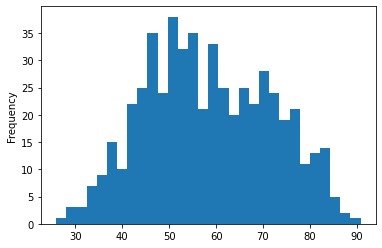

In [13]:
df3.RSI.plot.hist(bins=30)

In [14]:
# Oscilador estocástico

from ta.momentum import StochasticOscillator

so = StochasticOscillator(high=df2['High'], low=df2['Low'], close=df2['Close'], window=14)
df2['SO'] = so.stoch()
df2['SO_Signal'] = so.stoch_signal()
df2

Open   High    Low  Close     Volume Currency       PPO  \
Date                                                                   
2019-01-02  21.83  23.42  21.57  23.29  104534800      BRL       NaN   
2019-01-03  23.55  24.02  23.04  23.86   95206400      BRL       NaN   
2019-01-04  24.05  24.14  23.69  23.93   72119800      BRL       NaN   
2019-01-07  24.05  25.09  23.91  24.30  121711904      BRL       NaN   
2019-01-08  24.59  24.61  23.98  24.16   68761800      BRL       NaN   
...           ...    ...    ...    ...        ...      ...       ...   
2021-03-24  23.19  23.54  22.82  22.82   62209500      BRL -2.660539   
2021-03-25  22.70  23.30  22.16  23.20   78839800      BRL -2.471749   
2021-03-26  23.48  23.88  23.11  23.46   60631800      BRL -2.206641   
2021-03-29  23.34  23.83  23.28  23.83   49670900      BRL -1.847259   
2021-03-30  23.64  23.99  23.57  23.83   40703300      BRL -1.544694   

            PPO_hist  PPO_line         SO  SO_Signal  
Date                                                  
2019-01-02       NaN       NaN        NaN        NaN  
2019-01-03       NaN       NaN        NaN        NaN  
2019-01-04       NaN       NaN        NaN        NaN  
2019-01-07       NaN       NaN        NaN        NaN  
2019-01-08       NaN       NaN        NaN        NaN  
...              ...       ...        ...        ...  
2021-03-24  0.902104 -3.562644  59.938838  67.517909  
2021-03-25  0.872716 -3.344465  71.559633  63.608563  
2021-03-26  0.910259 -3.116900  79.510703  70.336391  
2021-03-29  1.015713 -2.862972  88.235294  79.768544  
2021-03-30  1.054622 -2.599316  84.771574  84.172524  

[556 rows x 11 columns]

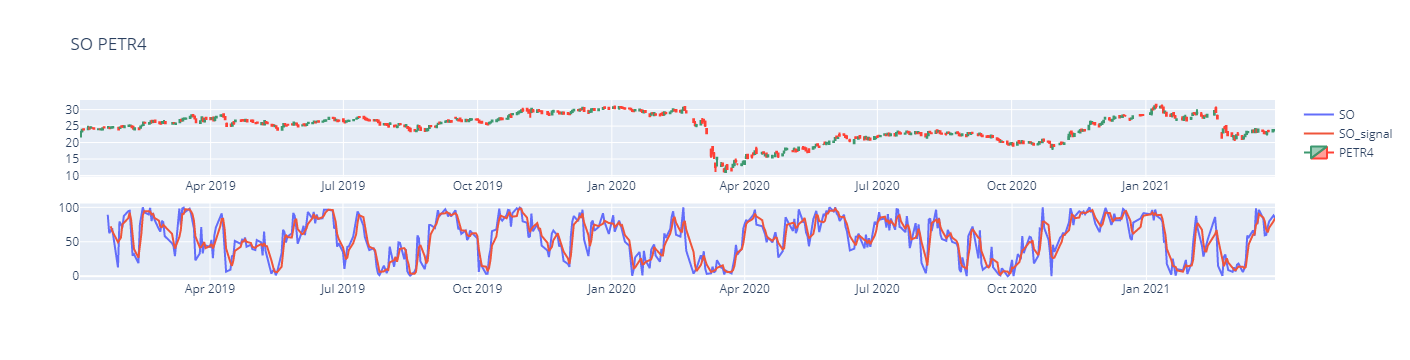

In [15]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='SO', x=df2.index, y=df2['SO']), row=2, col=1)
fig.add_trace(go.Scatter(name='SO_signal', x=df2.index, y=df2['SO_Signal']), row=2, col=1)
fig.add_trace(go.Candlestick(name='PETR4', x=df2.index, close=df2['Close'], open=df2['Open'], high=df2['High'], low=df2['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='SO PETR4')
fig.show()

## Indicadores de Volatilidade
### Bandas de Bollinger

In [16]:
from ta.volatility import BollingerBands

bb = BollingerBands(close=df1['Close'], window=20, window_dev=2)
df1['bb_bbm'] = bb.bollinger_mavg()
df1['bb_bbh'] = bb.bollinger_hband()
df1['bb_bbl'] = bb.bollinger_lband()
df1

Open   High    Low  Close    Volume Currency        ROC  bb_bbm  \
Date                                                                           
2019-01-02  12.22  12.63  12.12  12.59  14193800      BRL        NaN     NaN   
2019-01-03  12.48  12.68  12.36  12.67   9265200      BRL        NaN     NaN   
2019-01-04  12.55  12.71  12.43  12.43  11161000      BRL        NaN     NaN   
2019-01-07  12.31  12.44  12.14  12.35   4569500      BRL        NaN     NaN   
2019-01-08  12.40  12.44  12.25  12.37   4509200      BRL        NaN     NaN   
...           ...    ...    ...    ...       ...      ...        ...     ...   
2021-03-24   9.77  10.10   9.68   9.74  26928000      BRL  17.349398  8.8645   
2021-03-25   9.71   9.95   9.48   9.82  23246700      BRL  18.742443  8.9205   
2021-03-26   9.90   9.93   9.60   9.81  11872500      BRL  15.957447  8.9935   
2021-03-29   9.71   9.91   9.65   9.74   7898800      BRL   7.505519  9.0720   
2021-03-30   9.64  10.32   9.64  10.23  15812600      BRL  10.475162  9.1720   

               bb_bbh    bb_bbl  
Date                             
2019-01-02        NaN       NaN  
2019-01-03        NaN       NaN  
2019-01-04        NaN       NaN  
2019-01-07        NaN       NaN  
2019-01-08        NaN       NaN  
...               ...       ...  
2021-03-24   9.940427  7.788573  
2021-03-25  10.070395  7.770605  
2021-03-26  10.174216  7.812784  
2021-03-29  10.231855  7.912145  
2021-03-30  10.368522  7.975478  

[556 rows x 10 columns]

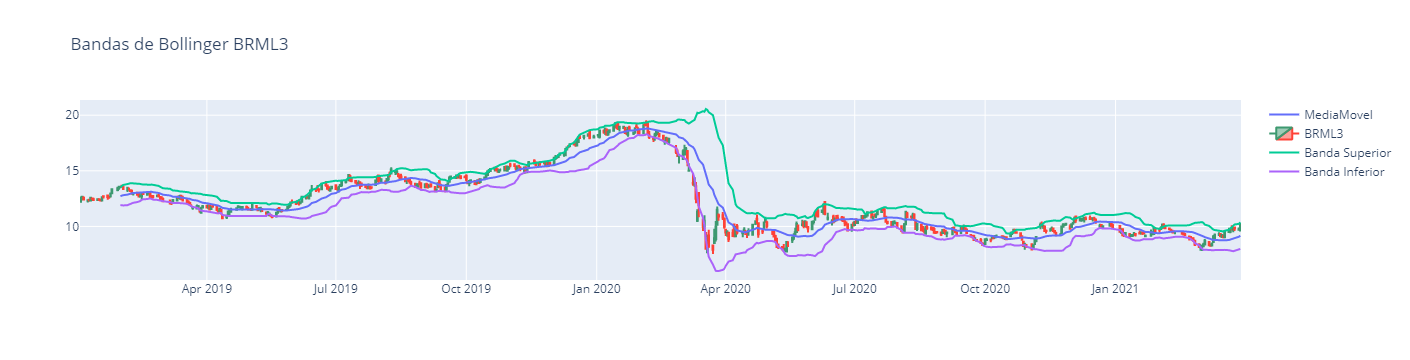

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='MediaMovel', x=df1.index, y=df1['bb_bbm']))
fig.add_trace(go.Candlestick(name='BRML3', x=df1.index, close=df1['Close'], open=df1['Open'], high=df1['High'], low=df1['Low']))
fig.add_trace(go.Scatter(name='Banda Superior', x=df1.index, y=df1['bb_bbh']))
fig.add_trace(go.Scatter(name='Banda Inferior', x=df1.index, y=df1['bb_bbl']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Bandas de Bollinger BRML3')
fig.show()

### ATR - Average True Range

In [19]:
from ta.volatility import AverageTrueRange

atr = AverageTrueRange(df3['High'], df3['Low'], df3['Close'])
df3['ATR'] = atr.average_true_range()
df3

Open   High    Low  Close    Volume Currency        RSI       ATR
Date                                                                          
2019-01-02   8.52   8.79   8.46   8.69   4751200      BRL        NaN  0.000000
2019-01-03   8.73   8.89   8.56   8.89   8316400      BRL        NaN  0.000000
2019-01-04   8.90   9.03   8.70   8.99   8340200      BRL        NaN  0.000000
2019-01-07   9.07   9.07   8.80   8.85   5860200      BRL        NaN  0.000000
2019-01-08   8.88   8.91   8.72   8.78   6306800      BRL        NaN  0.000000
...           ...    ...    ...    ...       ...      ...        ...       ...
2021-03-24  35.70  36.28  34.94  35.07  16129600      BRL  34.626743  1.396689
2021-03-25  35.07  35.57  34.72  35.34  11509400      BRL  36.832621  1.357639
2021-03-26  35.40  36.58  35.30  36.17  11053600      BRL  43.179834  1.352094
2021-03-29  35.92  36.22  35.48  35.87   9793200      BRL  41.554523  1.308373
2021-03-30  35.69  37.53  35.58  37.34  12421800      BRL  51.239606  1.354203

[556 rows x 8 columns]

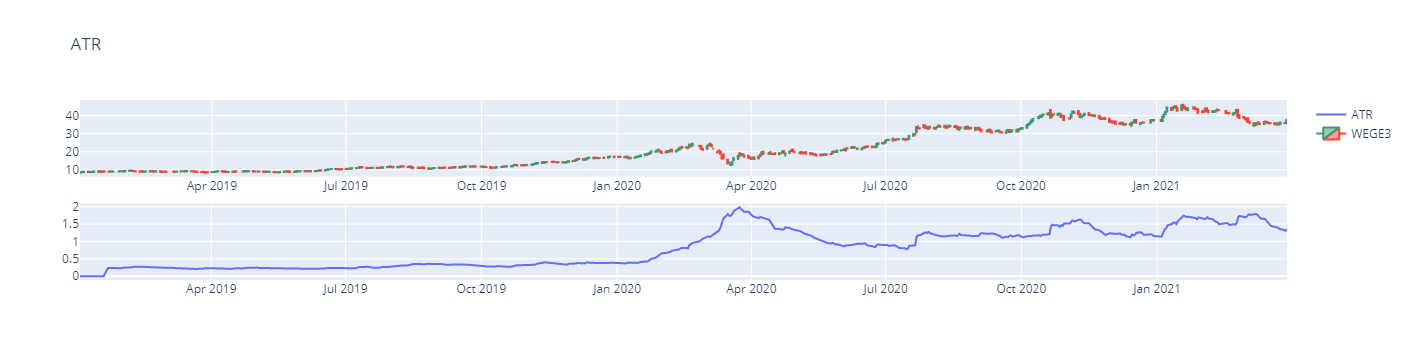

In [21]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='ATR', x=df3.index, y=df3['ATR']), row=2, col=1)
fig.add_trace(go.Candlestick(name='WEGE3', x=df3.index, close=df3['Close'], open=df3['Open'], high=df3['High'], low=df3['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='ATR')
fig.show()

## Indicadores de tendência
### MACD

In [22]:
from ta.trend import MACD

macd = MACD(df1['Close'])
df1['MACD'] = macd.macd()
df1['MACD_Diff'] = macd.macd_diff()
df1['MACD_Signal'] = macd.macd_signal()
df1

Open   High    Low  Close    Volume Currency        ROC  bb_bbm  \
Date                                                                           
2019-01-02  12.22  12.63  12.12  12.59  14193800      BRL        NaN     NaN   
2019-01-03  12.48  12.68  12.36  12.67   9265200      BRL        NaN     NaN   
2019-01-04  12.55  12.71  12.43  12.43  11161000      BRL        NaN     NaN   
2019-01-07  12.31  12.44  12.14  12.35   4569500      BRL        NaN     NaN   
2019-01-08  12.40  12.44  12.25  12.37   4509200      BRL        NaN     NaN   
...           ...    ...    ...    ...       ...      ...        ...     ...   
2021-03-24   9.77  10.10   9.68   9.74  26928000      BRL  17.349398  8.8645   
2021-03-25   9.71   9.95   9.48   9.82  23246700      BRL  18.742443  8.9205   
2021-03-26   9.90   9.93   9.60   9.81  11872500      BRL  15.957447  8.9935   
2021-03-29   9.71   9.91   9.65   9.74   7898800      BRL   7.505519  9.0720   
2021-03-30   9.64  10.32   9.64  10.23  15812600      BRL  10.475162  9.1720   

               bb_bbh    bb_bbl      MACD  MACD_Diff  MACD_Signal  
Date                                                               
2019-01-02        NaN       NaN       NaN        NaN          NaN  
2019-01-03        NaN       NaN       NaN        NaN          NaN  
2019-01-04        NaN       NaN       NaN        NaN          NaN  
2019-01-07        NaN       NaN       NaN        NaN          NaN  
2019-01-08        NaN       NaN       NaN        NaN          NaN  
...               ...       ...       ...        ...          ...  
2021-03-24   9.940427  7.788573  0.130896   0.142958    -0.012062  
2021-03-25  10.070395  7.770605  0.164304   0.141092     0.023211  
2021-03-26  10.174216  7.812784  0.187808   0.131677     0.056130  
2021-03-29  10.231855  7.912145  0.198498   0.113894     0.084604  
2021-03-30  10.368522  7.975478  0.243700   0.127277     0.116423  

[556 rows x 13 columns]

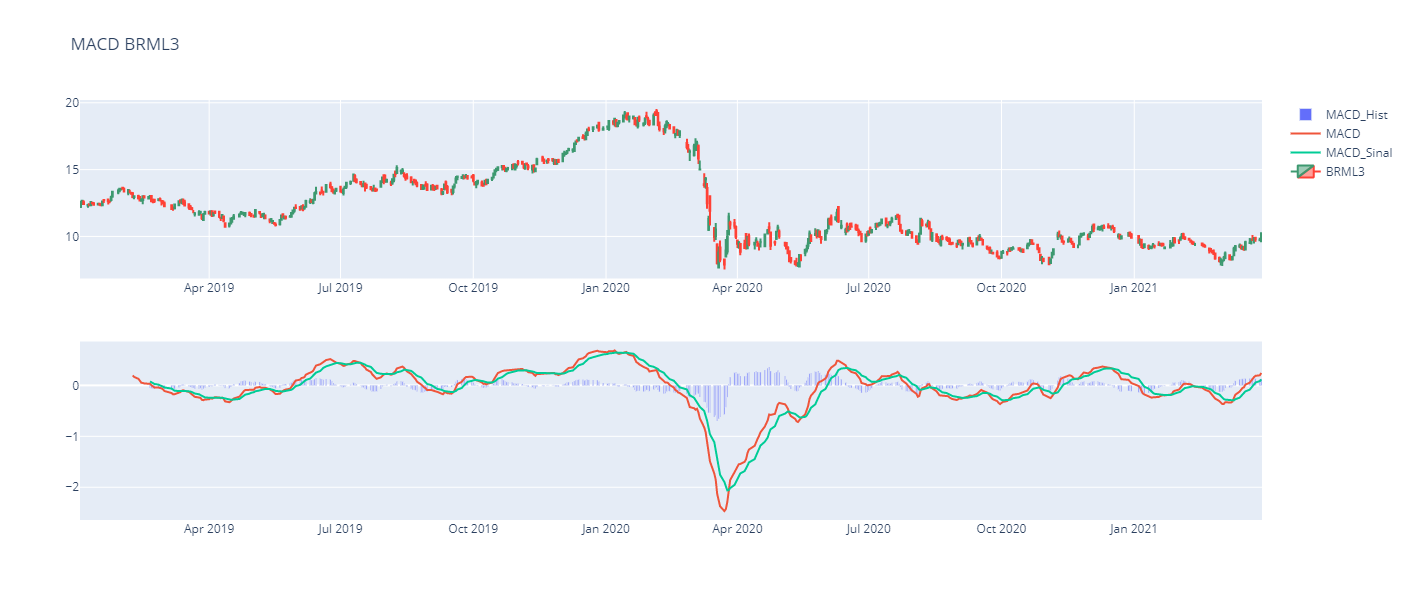

In [32]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(name='MACD_Hist', x=df1.index, y=df1['MACD_Diff']), row=2, col=1)
fig.add_trace(go.Scatter(name='MACD', x=df1.index, y=df1['MACD']), row=2, col=1)
fig.add_trace(go.Scatter(name='MACD_Sinal', x=df1.index, y=df1['MACD_Signal']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df1.index, close=df1['Close'], open=df1.Open, high=df1.High, low=df1.Low), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='MACD BRML3', width=1200, height=600)
fig.show()

### Médias móveis

In [33]:
# Média móvel simples

from ta.trend import SMAIndicator

mms_rapida = SMAIndicator(df2['Close'], window=12)
mms_lenta = SMAIndicator(df2['Close'], window=26)
df2['MMS_Rapida'] = mms_rapida.sma_indicator()
df2['MMS_Lenta'] = mms_lenta.sma_indicator()
df2

Open   High    Low  Close     Volume Currency       PPO  \
Date                                                                   
2019-01-02  21.83  23.42  21.57  23.29  104534800      BRL       NaN   
2019-01-03  23.55  24.02  23.04  23.86   95206400      BRL       NaN   
2019-01-04  24.05  24.14  23.69  23.93   72119800      BRL       NaN   
2019-01-07  24.05  25.09  23.91  24.30  121711904      BRL       NaN   
2019-01-08  24.59  24.61  23.98  24.16   68761800      BRL       NaN   
...           ...    ...    ...    ...        ...      ...       ...   
2021-03-24  23.19  23.54  22.82  22.82   62209500      BRL -2.660539   
2021-03-25  22.70  23.30  22.16  23.20   78839800      BRL -2.471749   
2021-03-26  23.48  23.88  23.11  23.46   60631800      BRL -2.206641   
2021-03-29  23.34  23.83  23.28  23.83   49670900      BRL -1.847259   
2021-03-30  23.64  23.99  23.57  23.83   40703300      BRL -1.544694   

            PPO_hist  PPO_line         SO  SO_Signal  MMS_Rapida  MMS_Lenta  
Date                                                                         
2019-01-02       NaN       NaN        NaN        NaN         NaN        NaN  
2019-01-03       NaN       NaN        NaN        NaN         NaN        NaN  
2019-01-04       NaN       NaN        NaN        NaN         NaN        NaN  
2019-01-07       NaN       NaN        NaN        NaN         NaN        NaN  
2019-01-08       NaN       NaN        NaN        NaN         NaN        NaN  
...              ...       ...        ...        ...         ...        ...  
2021-03-24  0.902104 -3.562644  59.938838  67.517909   23.148333  23.469231  
2021-03-25  0.872716 -3.344465  71.559633  63.608563   23.282500  23.223462  
2021-03-26  0.910259 -3.116900  79.510703  70.336391   23.375833  23.000000  
2021-03-29  1.015713 -2.862972  88.235294  79.768544   23.420833  22.865385  
2021-03-30  1.054622 -2.599316  84.771574  84.172524   23.475833  22.956923  

[556 rows x 13 columns]

In [34]:
# Média móvel exponencial

from ta.trend import EMAIndicator

ema_rapida = EMAIndicator(df2['Close'], window=12)
ema_lenta = EMAIndicator(df2['Close'], window=26)
df2['EMA_Rapida'] = ema_rapida.ema_indicator()
df2['EMA_Lenta'] = ema_lenta.ema_indicator()
df2

Open   High    Low  Close     Volume Currency       PPO  \
Date                                                                   
2019-01-02  21.83  23.42  21.57  23.29  104534800      BRL       NaN   
2019-01-03  23.55  24.02  23.04  23.86   95206400      BRL       NaN   
2019-01-04  24.05  24.14  23.69  23.93   72119800      BRL       NaN   
2019-01-07  24.05  25.09  23.91  24.30  121711904      BRL       NaN   
2019-01-08  24.59  24.61  23.98  24.16   68761800      BRL       NaN   
...           ...    ...    ...    ...        ...      ...       ...   
2021-03-24  23.19  23.54  22.82  22.82   62209500      BRL -2.660539   
2021-03-25  22.70  23.30  22.16  23.20   78839800      BRL -2.471749   
2021-03-26  23.48  23.88  23.11  23.46   60631800      BRL -2.206641   
2021-03-29  23.34  23.83  23.28  23.83   49670900      BRL -1.847259   
2021-03-30  23.64  23.99  23.57  23.83   40703300      BRL -1.544694   

            PPO_hist  PPO_line         SO  SO_Signal  MMS_Rapida  MMS_Lenta  \
Date                                                                          
2019-01-02       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-03       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-04       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-07       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-08       NaN       NaN        NaN        NaN         NaN        NaN   
...              ...       ...        ...        ...         ...        ...   
2021-03-24  0.902104 -3.562644  59.938838  67.517909   23.148333  23.469231   
2021-03-25  0.872716 -3.344465  71.559633  63.608563   23.282500  23.223462   
2021-03-26  0.910259 -3.116900  79.510703  70.336391   23.375833  23.000000   
2021-03-29  1.015713 -2.862972  88.235294  79.768544   23.420833  22.865385   
2021-03-30  1.054622 -2.599316  84.771574  84.172524   23.475833  22.956923   

            EMA_Rapida  EMA_Lenta  
Date                               
2019-01-02         NaN        NaN  
2019-01-03         NaN        NaN  
2019-01-04         NaN        NaN  
2019-01-07         NaN        NaN  
2019-01-08         NaN        NaN  
...                ...        ...  
2021-03-24   23.209980  23.844369  
2021-03-25   23.208445  23.796638  
2021-03-26   23.247145  23.771702  
2021-03-29   23.336815  23.776020  
2021-03-30   23.412690  23.780018  

[556 rows x 15 columns]

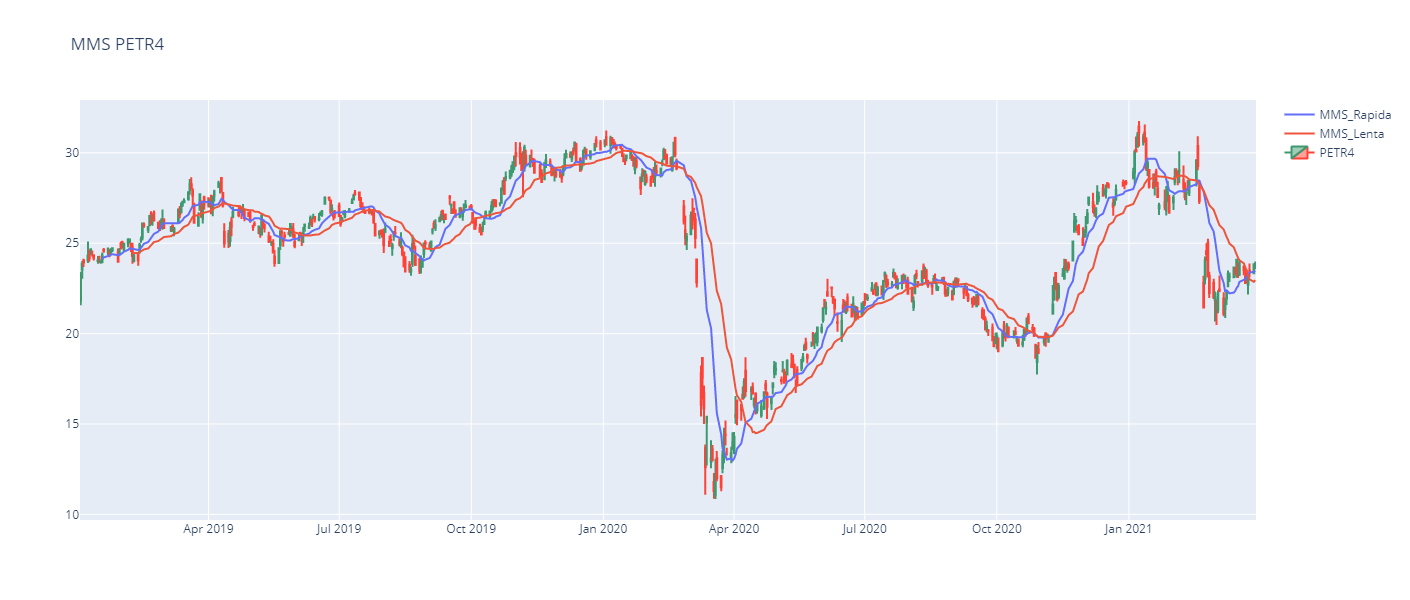

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='MMS_Rapida', x=df2.index, y=df2['MMS_Rapida']))
fig.add_trace(go.Scatter(name='MMS_Lenta', x=df2.index, y=df2['MMS_Lenta']))
fig.add_trace(go.Candlestick(name='PETR4', x=df2.index, close=df2['Close'], open=df2.Open, high=df2.High, low=df2.Low))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='MMS PETR4', width=1400, height=600)
fig.show()

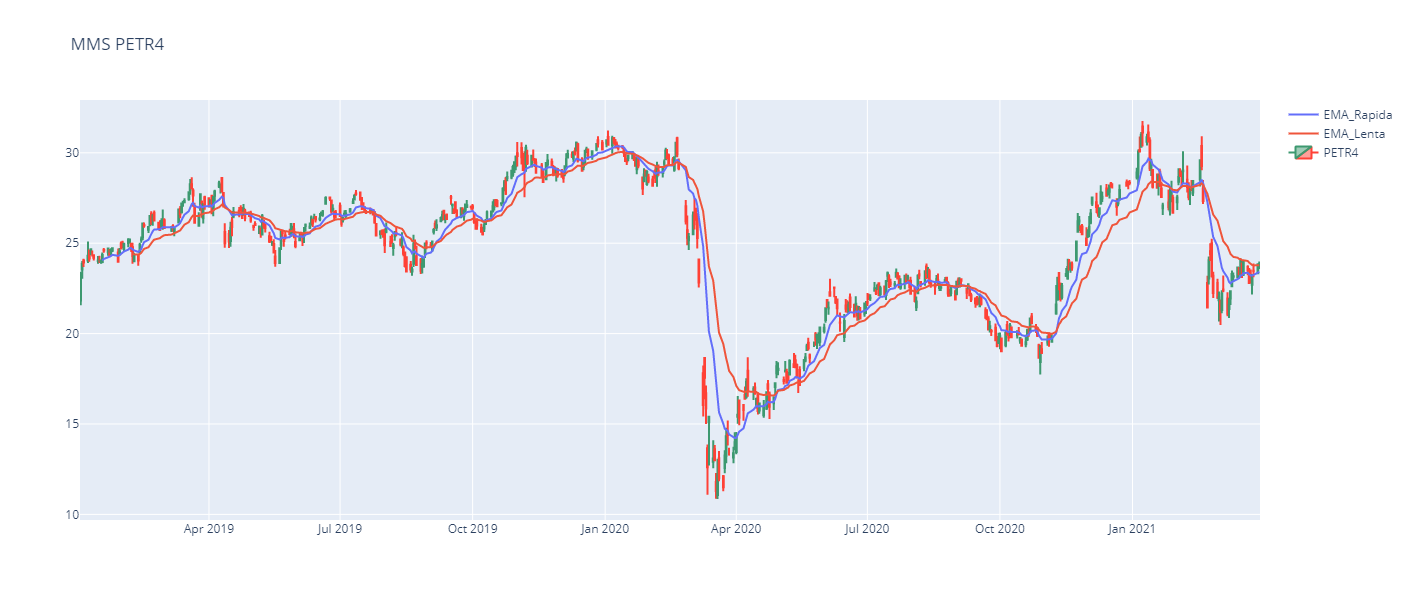

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='EMA_Rapida', x=df2.index, y=df2['EMA_Rapida']))
fig.add_trace(go.Scatter(name='EMA_Lenta', x=df2.index, y=df2['EMA_Lenta']))
fig.add_trace(go.Candlestick(name='PETR4', x=df2.index, close=df2['Close'], open=df2.Open, high=df2.High, low=df2.Low))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='MMS PETR4', width=1400, height=600)
fig.show()

## Indicadores de Volume
### OBV - On Balance Volume

In [39]:
from ta.volume import OnBalanceVolumeIndicator

obv = OnBalanceVolumeIndicator(df1['Close'], df1['Volume'])
df1['OBV'] = obv.on_balance_volume()
df1

Open   High    Low  Close    Volume Currency        ROC  bb_bbm  \
Date                                                                           
2019-01-02  12.22  12.63  12.12  12.59  14193800      BRL        NaN     NaN   
2019-01-03  12.48  12.68  12.36  12.67   9265200      BRL        NaN     NaN   
2019-01-04  12.55  12.71  12.43  12.43  11161000      BRL        NaN     NaN   
2019-01-07  12.31  12.44  12.14  12.35   4569500      BRL        NaN     NaN   
2019-01-08  12.40  12.44  12.25  12.37   4509200      BRL        NaN     NaN   
...           ...    ...    ...    ...       ...      ...        ...     ...   
2021-03-24   9.77  10.10   9.68   9.74  26928000      BRL  17.349398  8.8645   
2021-03-25   9.71   9.95   9.48   9.82  23246700      BRL  18.742443  8.9205   
2021-03-26   9.90   9.93   9.60   9.81  11872500      BRL  15.957447  8.9935   
2021-03-29   9.71   9.91   9.65   9.74   7898800      BRL   7.505519  9.0720   
2021-03-30   9.64  10.32   9.64  10.23  15812600      BRL  10.475162  9.1720   

               bb_bbh    bb_bbl      MACD  MACD_Diff  MACD_Signal        OBV  
Date                                                                          
2019-01-02        NaN       NaN       NaN        NaN          NaN   14193800  
2019-01-03        NaN       NaN       NaN        NaN          NaN   23459000  
2019-01-04        NaN       NaN       NaN        NaN          NaN   12298000  
2019-01-07        NaN       NaN       NaN        NaN          NaN    7728500  
2019-01-08        NaN       NaN       NaN        NaN          NaN   12237700  
...               ...       ...       ...        ...          ...        ...  
2021-03-24   9.940427  7.788573  0.130896   0.142958    -0.012062 -196387204  
2021-03-25  10.070395  7.770605  0.164304   0.141092     0.023211 -173140504  
2021-03-26  10.174216  7.812784  0.187808   0.131677     0.056130 -185013004  
2021-03-29  10.231855  7.912145  0.198498   0.113894     0.084604 -192911804  
2021-03-30  10.368522  7.975478  0.243700   0.127277     0.116423 -177099204  

[556 rows x 14 columns]

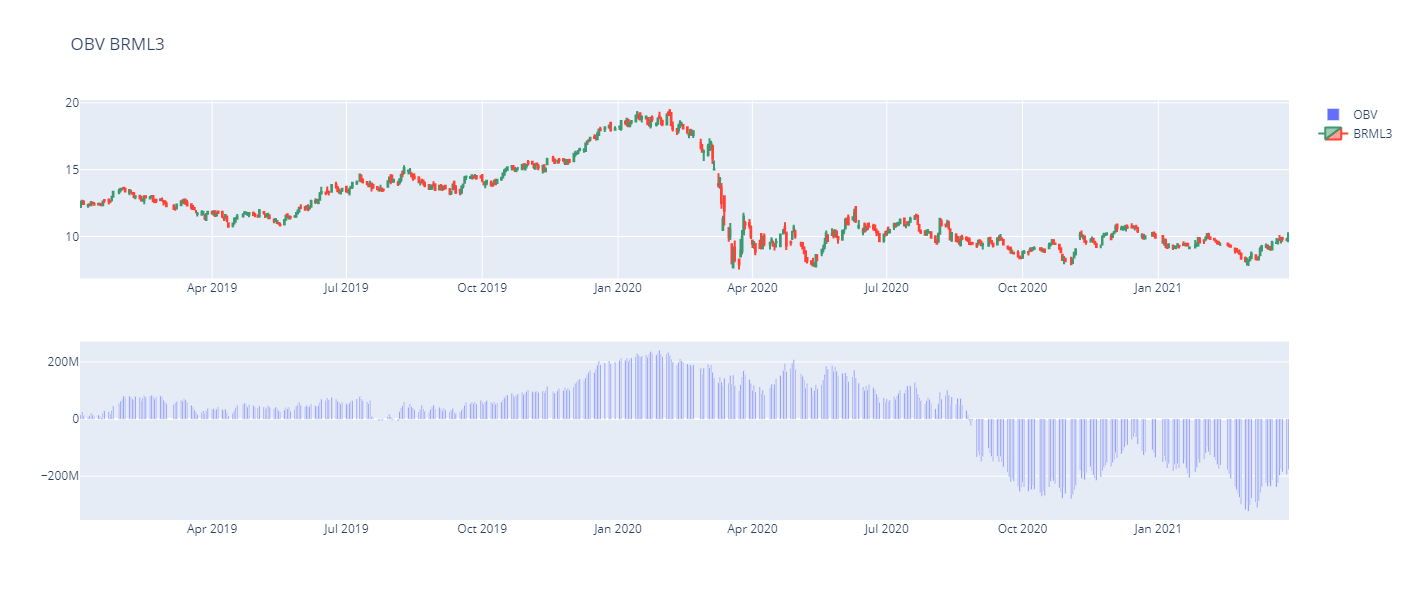

In [40]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(name='OBV', x=df1.index, y=df1['OBV']), row=2, col=1)
fig.add_trace(go.Candlestick(name='BRML3', x=df1.index, close=df1['Close'], open=df1.Open, high=df1.High, low=df1.Low), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='OBV BRML3', width=1400, height=600)
fig.show()

### VWAP - Volume Weighted Average Price

In [41]:
from ta.volume import VolumeWeightedAveragePrice

vwap = VolumeWeightedAveragePrice(df2['High'], df2['Low'], df2['Close'], df2['Volume'])
df2['VWAP'] = vwap.volume_weighted_average_price()
df2

Open   High    Low  Close     Volume Currency       PPO  \
Date                                                                   
2019-01-02  21.83  23.42  21.57  23.29  104534800      BRL       NaN   
2019-01-03  23.55  24.02  23.04  23.86   95206400      BRL       NaN   
2019-01-04  24.05  24.14  23.69  23.93   72119800      BRL       NaN   
2019-01-07  24.05  25.09  23.91  24.30  121711904      BRL       NaN   
2019-01-08  24.59  24.61  23.98  24.16   68761800      BRL       NaN   
...           ...    ...    ...    ...        ...      ...       ...   
2021-03-24  23.19  23.54  22.82  22.82   62209500      BRL -2.660539   
2021-03-25  22.70  23.30  22.16  23.20   78839800      BRL -2.471749   
2021-03-26  23.48  23.88  23.11  23.46   60631800      BRL -2.206641   
2021-03-29  23.34  23.83  23.28  23.83   49670900      BRL -1.847259   
2021-03-30  23.64  23.99  23.57  23.83   40703300      BRL -1.544694   

            PPO_hist  PPO_line         SO  SO_Signal  MMS_Rapida  MMS_Lenta  \
Date                                                                          
2019-01-02       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-03       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-04       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-07       NaN       NaN        NaN        NaN         NaN        NaN   
2019-01-08       NaN       NaN        NaN        NaN         NaN        NaN   
...              ...       ...        ...        ...         ...        ...   
2021-03-24  0.902104 -3.562644  59.938838  67.517909   23.148333  23.469231   
2021-03-25  0.872716 -3.344465  71.559633  63.608563   23.282500  23.223462   
2021-03-26  0.910259 -3.116900  79.510703  70.336391   23.375833  23.000000   
2021-03-29  1.015713 -2.862972  88.235294  79.768544   23.420833  22.865385   
2021-03-30  1.054622 -2.599316  84.771574  84.172524   23.475833  22.956923   

            EMA_Rapida  EMA_Lenta       VWAP  
Date                                          
2019-01-02         NaN        NaN        NaN  
2019-01-03         NaN        NaN        NaN  
2019-01-04         NaN        NaN        NaN  
2019-01-07         NaN        NaN        NaN  
2019-01-08         NaN        NaN        NaN  
...                ...        ...        ...  
2021-03-24   23.209980  23.844369  22.759694  
2021-03-25   23.208445  23.796638  22.781893  
2021-03-26   23.247145  23.771702  22.993926  
2021-03-29   23.336815  23.776020  23.209952  
2021-03-30   23.412690  23.780018  23.367970  

[556 rows x 16 columns]

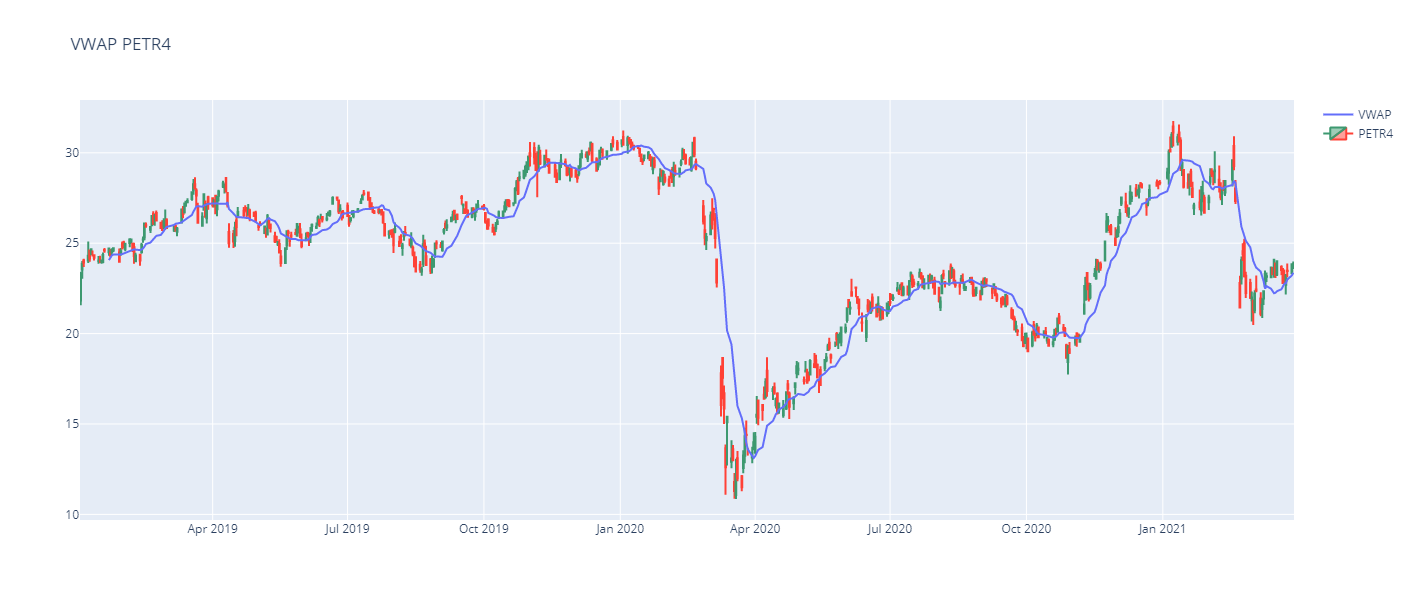

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='VWAP', x=df2.index, y=df2['VWAP']))
fig.add_trace(go.Candlestick(name='PETR4', x=df2.index, close=df2['Close'], open=df2.Open, high=df2.High, low=df2.Low))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='VWAP PETR4', width=1400, height=600)
fig.show()